<a href="https://colab.research.google.com/github/Geckomonc/AI20242---GeraldineAcevedo-MairaRodas/blob/main/01%20-%20exploraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto Kaggle

In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources


#Descargando la data de Kaggle

In [5]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai4eng-20242

 25% 5.00M/20.1M [00:00<00:00, 30.1MB/s]
100% 20.1M/20.1M [00:00<00:00, 83.1MB/s]


#Unzip and inspect data

In [6]:
!unzip udea*.zip > /dev/null

In [7]:
!wc *.csv

   296787    296787   4716673 submission_example.csv
   296787   4565553  50135751 test.csv
   692501  10666231 118025055 train.csv
  1286075  15528571 172877479 total


#Cargar datos de entrenamiento con panda

In [8]:
import pandas as pd
import numpy as np

data = pd.read_csv("train.csv")
print ("shape of loaded dataframe", data.shape)


shape of loaded dataframe (692500, 12)


In [9]:
data.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


#Exploración de los datos

Vamos a visualizar todas las columnas como gráficas con el fin de comprender mejor los datos y ver la cantidad de estudiantes por valor.

<Axes: xlabel='PERIODO'>

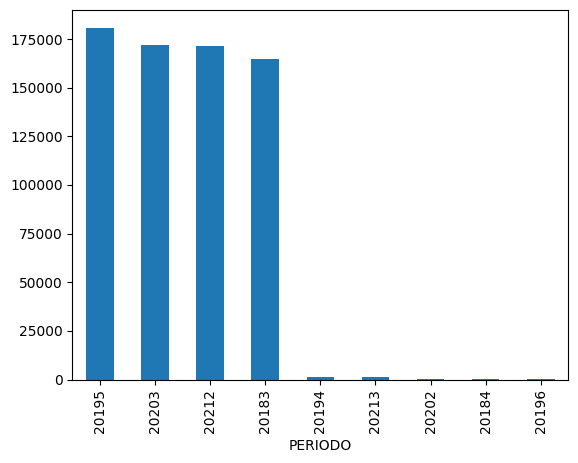

In [10]:
data.PERIODO.value_counts().plot(kind='bar')

Nos hemos dado cuenta que se debe realizar una nueva organización de valores de la columna de programas académicos porque se tienen mucho valores únicos.

In [11]:
data["ESTU_PRGM_ACADEMICO"].unique()

array(['ENFERMERIA', 'DERECHO', 'MERCADEO Y PUBLICIDAD',
       'ADMINISTRACION DE EMPRESAS', 'PSICOLOGIA', 'MEDICINA VETERINARIA',
       'INGENIERIA MECANICA', 'ADMINISTRACIÓN EN SALUD OCUPACIONAL',
       'INGENIERIA INDUSTRIAL', 'ADMINISTRACIÓN FINANCIERA',
       'HOTELERIA Y TURISMO', 'LICENCIATURA EN CIENCIAS SOCIALES',
       'LICENCIATURA EN PEDAGOGIA INFANTIL', 'COMUNICACION SOCIAL',
       'CIENCIA POLITICA',
       'PROFESIONAL EN GESTIÓN DE LA SEGURIDAD Y LA SALUD LABORAL',
       'MAESTRO EN MÚSICA', 'INGENIERIA MECATRONICA', 'TRABAJO SOCIAL',
       'LICENCIATURA EN BIOLOGIA Y EDUCACION AMBIENTAL',
       'INGENIERIA CIVIL', 'CONTADURIA PÚBLICA',
       'ADMINISTRACION EN SALUD', 'ADMINISTRACIÓN DE EMPRESAS',
       'ESTADISTICA', 'LICENCIATURA EN BIOLOGIA',
       'INGENIERIA AGROINDUSTRIAL', 'ZOOTECNIA',
       'COMUNICACION AUDIOVISUAL',
       'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN HUMANIDADES-INGLES',
       'COMUNICACION SOCIAL  - PERIODISMO',
       'SEG

<Axes: xlabel='ESTU_PRGM_ACADEMICO'>

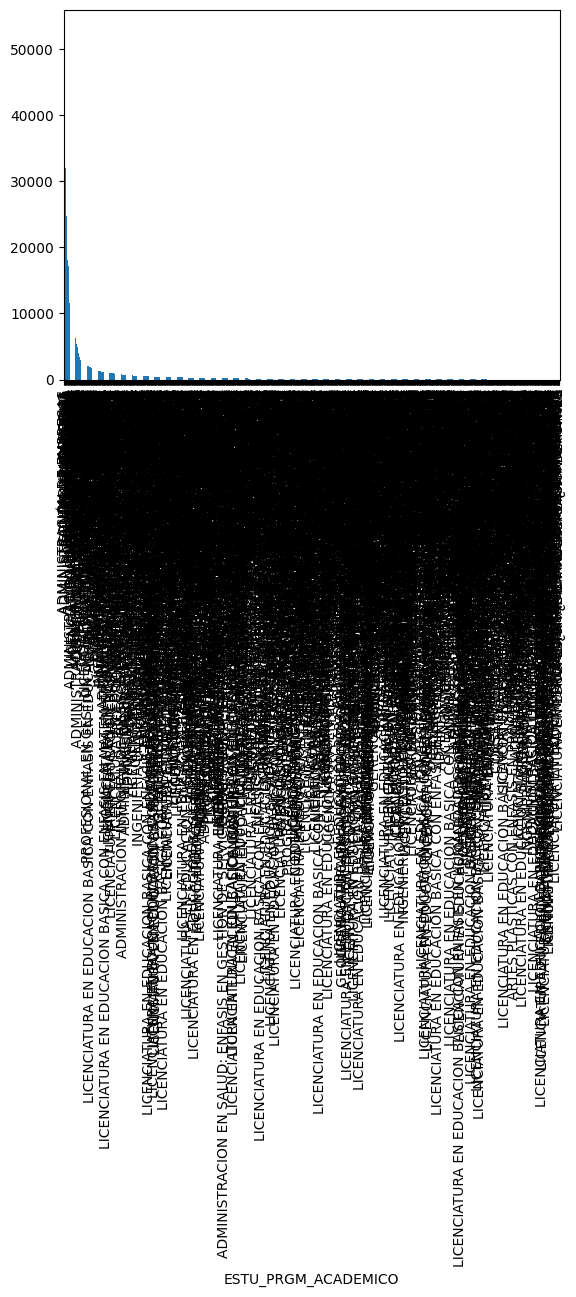

In [12]:
data.ESTU_PRGM_ACADEMICO.value_counts().plot(kind='bar')

<Axes: xlabel='ESTU_PRGM_DEPARTAMENTO'>

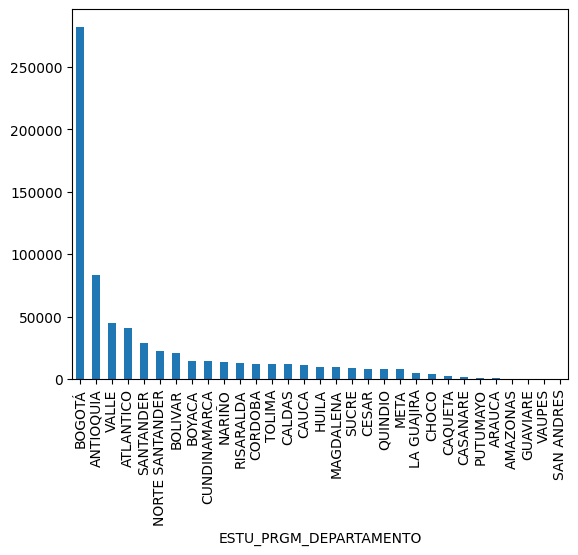

In [13]:
data.ESTU_PRGM_DEPARTAMENTO.value_counts().plot(kind='bar')

<Axes: xlabel='ESTU_VALORMATRICULAUNIVERSIDAD'>

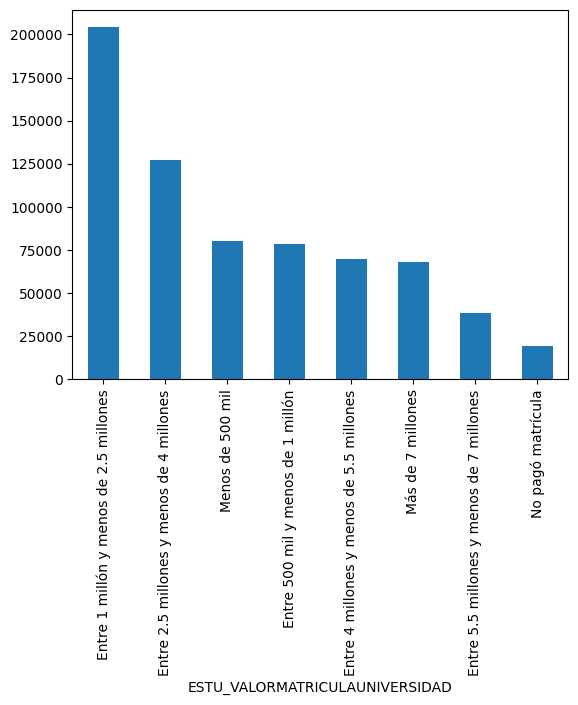

In [14]:
data.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts().plot(kind='bar')

<Axes: xlabel='ESTU_HORASSEMANATRABAJA'>

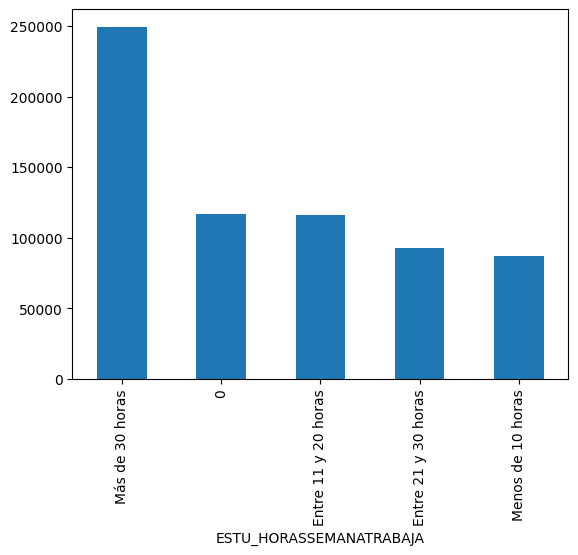

In [15]:
data.ESTU_HORASSEMANATRABAJA.value_counts().plot(kind='bar')

<Axes: xlabel='FAMI_ESTRATOVIVIENDA'>

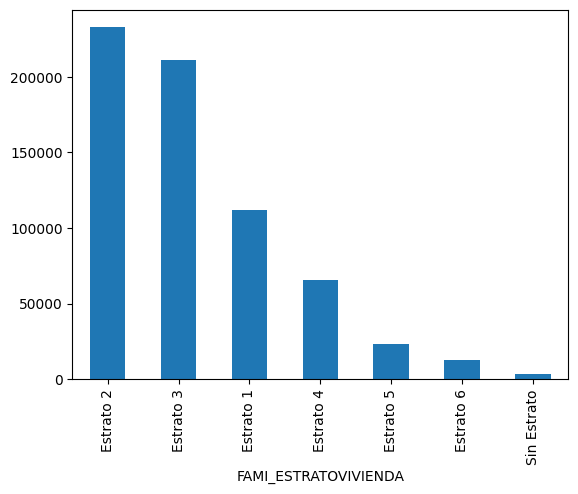

In [16]:
data.FAMI_ESTRATOVIVIENDA.value_counts().plot(kind='bar')

<Axes: xlabel='FAMI_TIENEINTERNET'>

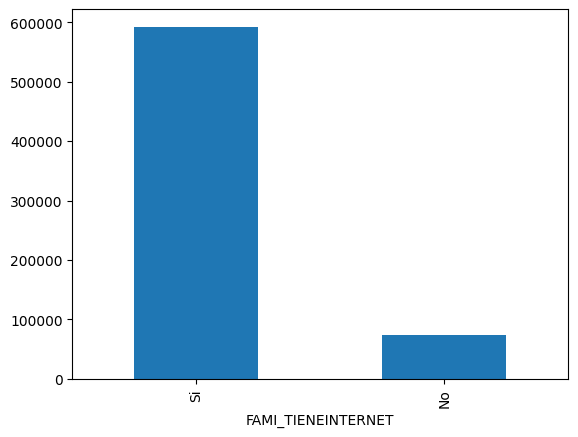

In [17]:
data.FAMI_TIENEINTERNET.value_counts().plot(kind='bar')

<Axes: xlabel='FAMI_EDUCACIONPADRE'>

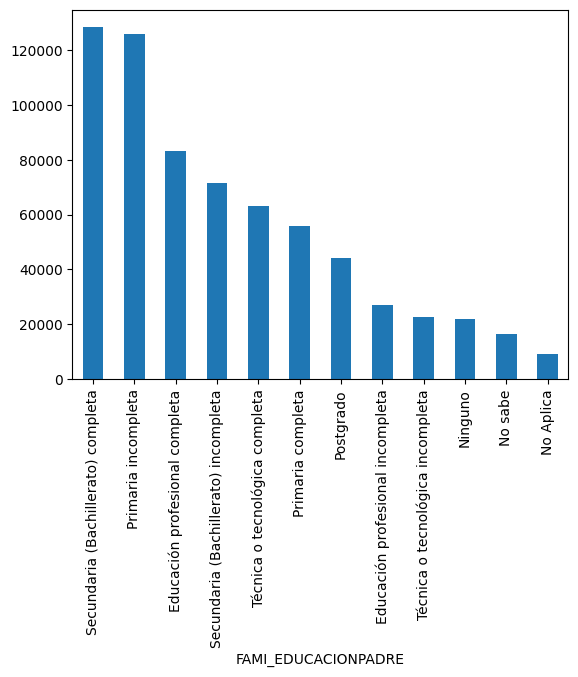

In [18]:
data.FAMI_EDUCACIONPADRE.value_counts().plot(kind='bar')

<Axes: xlabel='FAMI_EDUCACIONMADRE'>

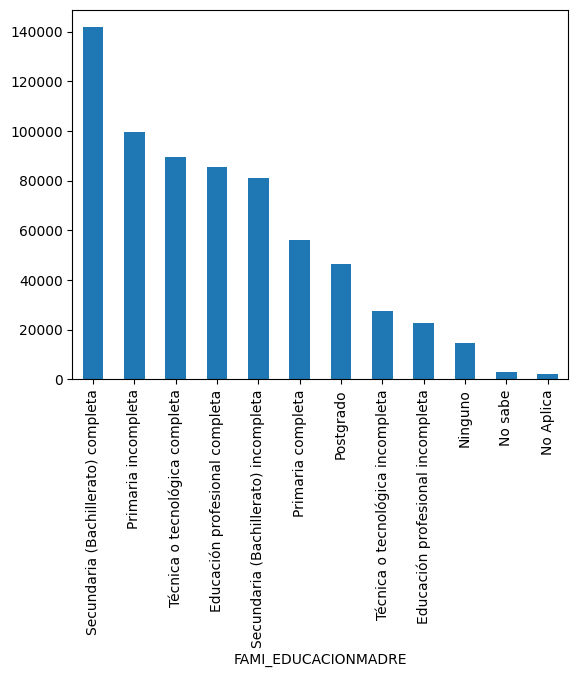

In [19]:
data.FAMI_EDUCACIONMADRE.value_counts().plot(kind='bar')

<Axes: xlabel='ESTU_PAGOMATRICULAPROPIO'>

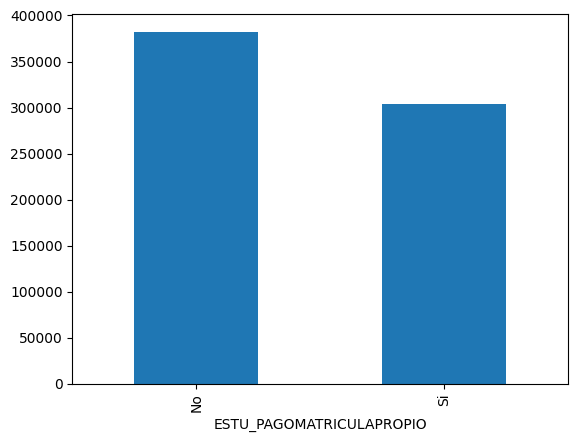

In [20]:
data.ESTU_PAGOMATRICULAPROPIO.value_counts().plot(kind='bar')

#Visualización de las influencias

Ahora queremos ver como se relaciona el rendimiento global de los estudiantes con los valores únicos de cada columna, e intentar visualizar a primera vista si existe algún tipo de influencia sobre el rendimiento global.

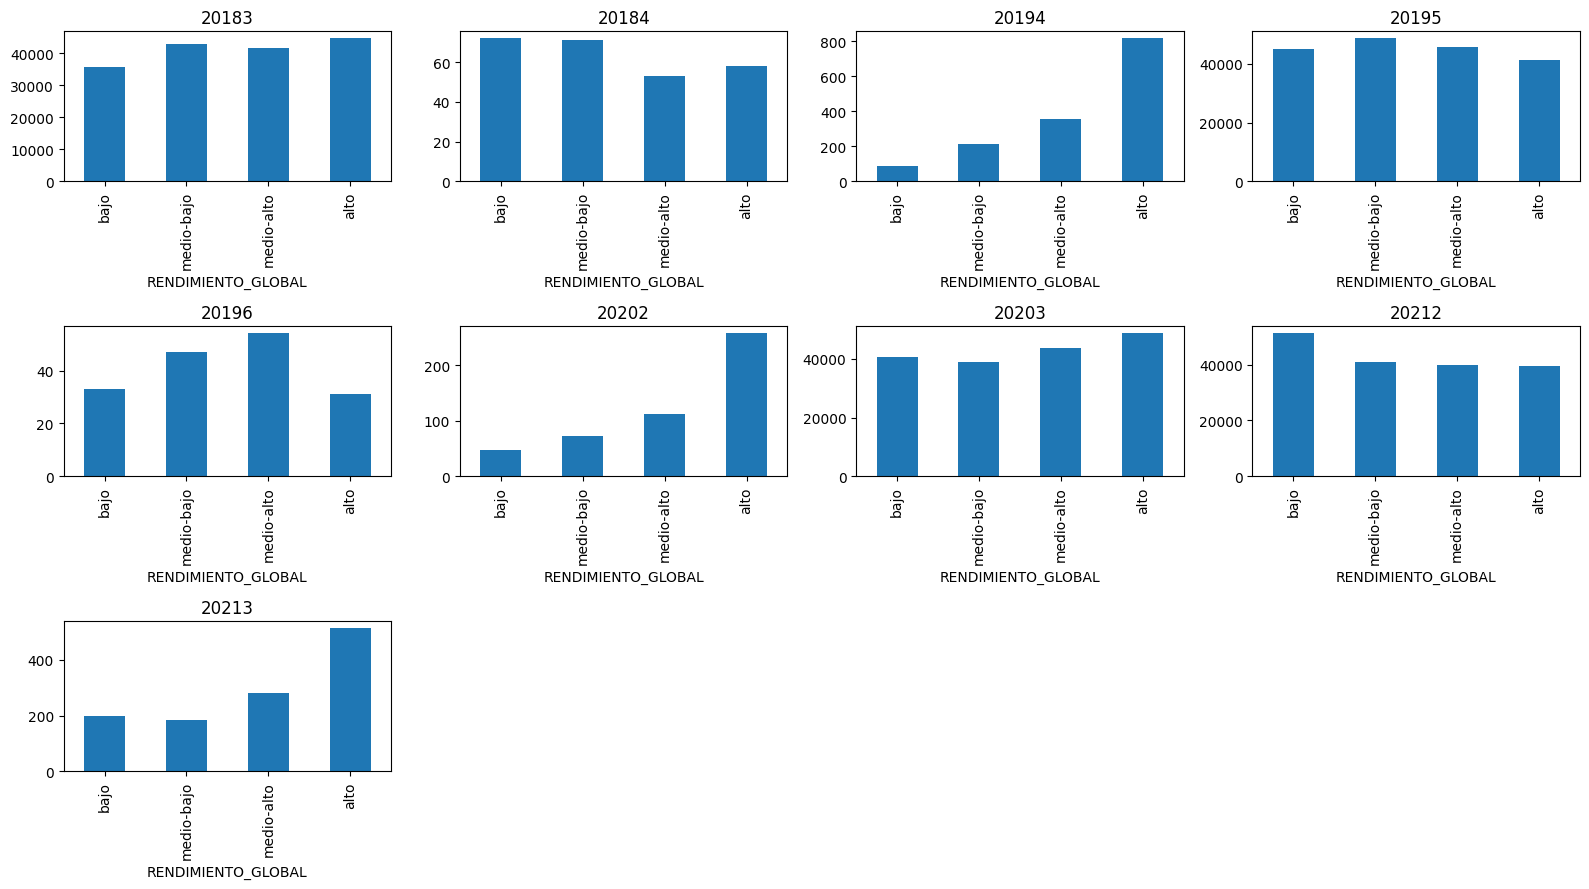

In [21]:
from rlxutils import subplots
import matplotlib.pyplot as plt

column = data.PERIODO

c = sorted(column.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = data[column==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

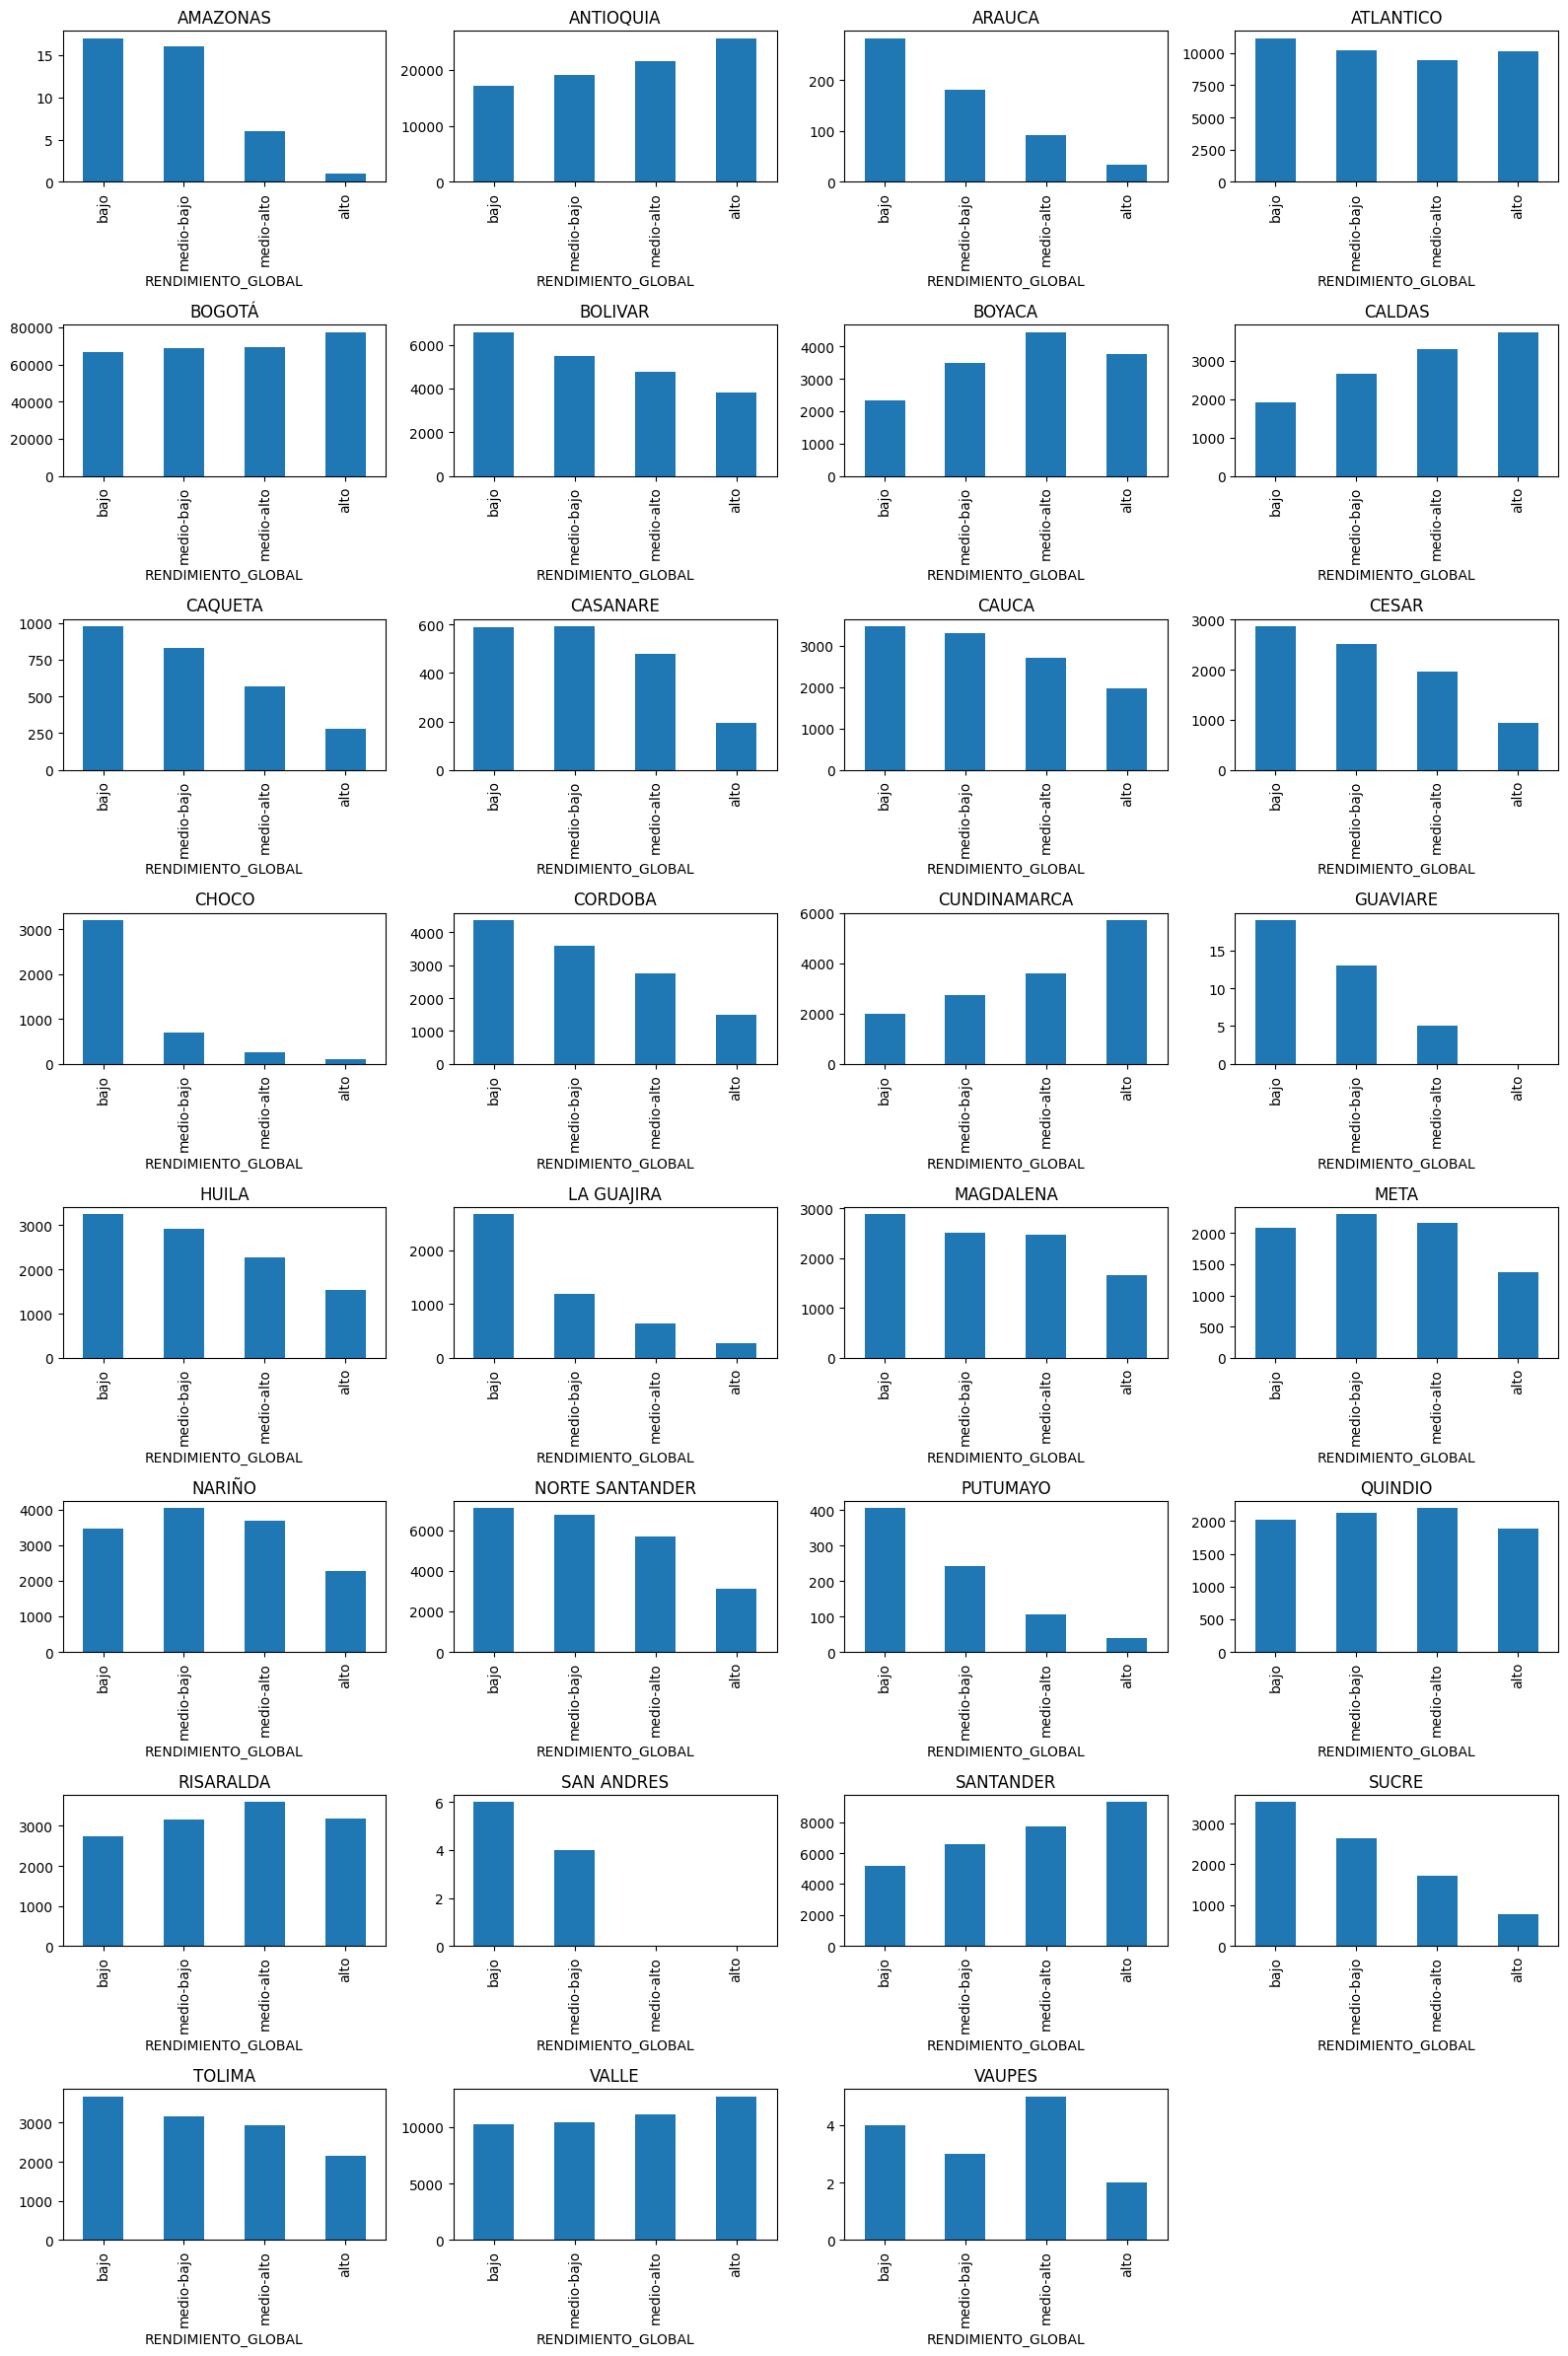

In [22]:
column = data.ESTU_PRGM_DEPARTAMENTO

c = sorted(column.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = data[column==ci]
    counts = zc.RENDIMIENTO_GLOBAL.value_counts().reindex(['bajo', 'medio-bajo', 'medio-alto', 'alto'], fill_value=0)
    counts.plot(kind='bar', ax=ax)
    ax.set_title(ci)
plt.tight_layout()
plt.show()

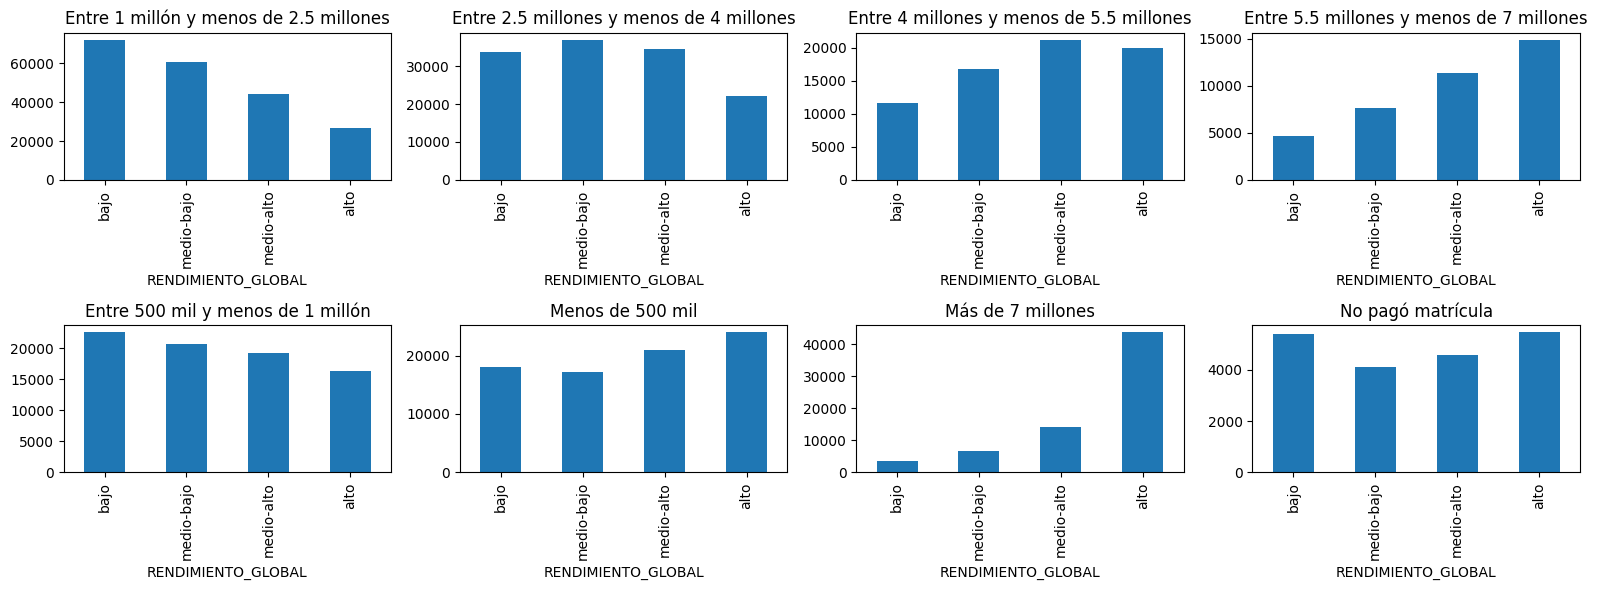

In [23]:
column = data.ESTU_VALORMATRICULAUNIVERSIDAD

c = sorted(column.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = data[column==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

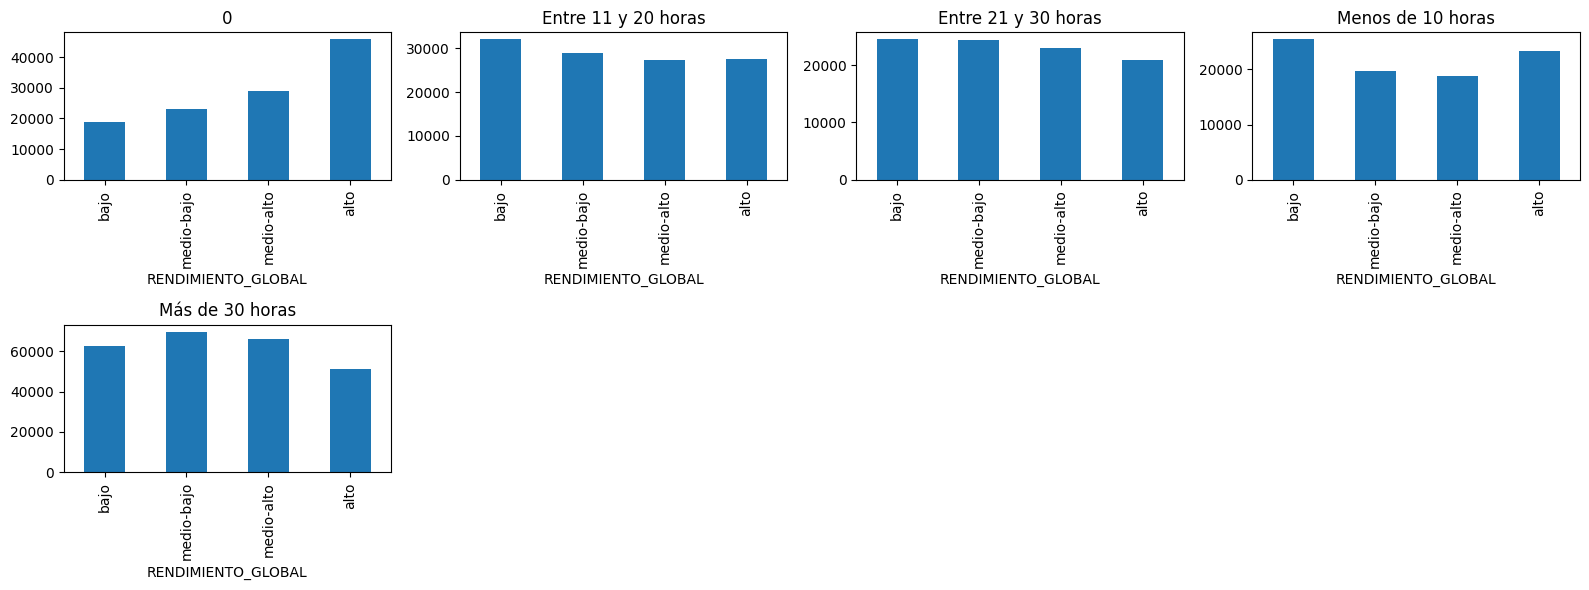

In [24]:
column = data.ESTU_HORASSEMANATRABAJA

c = sorted(column.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = data[column==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

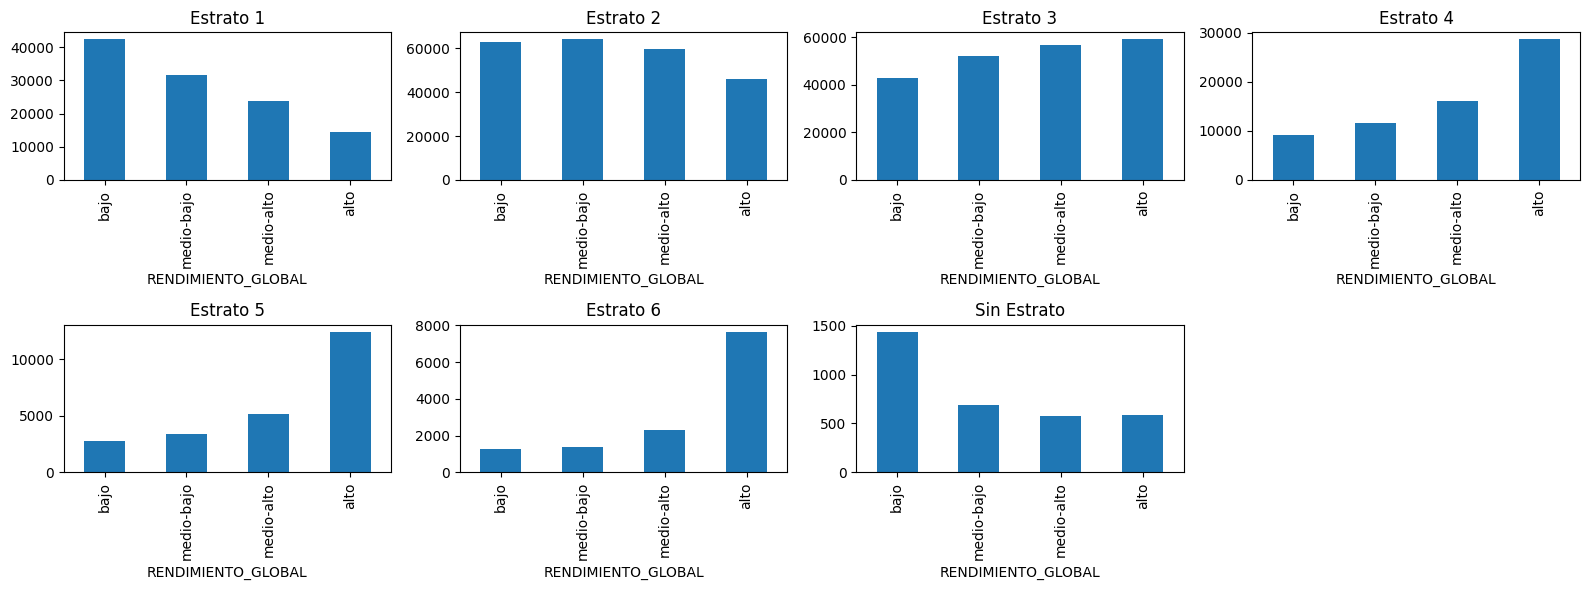

In [25]:
column = data.FAMI_ESTRATOVIVIENDA

c = sorted(column.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = data[column==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

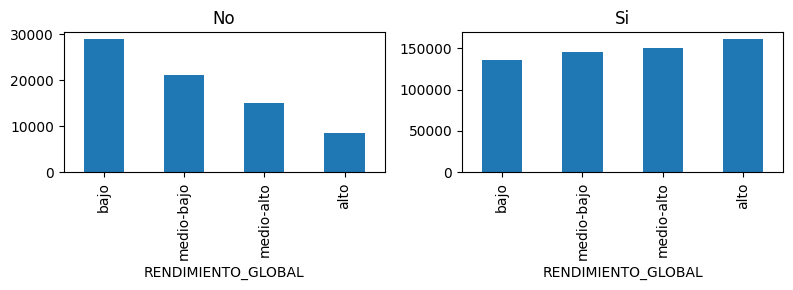

In [26]:
column = data.FAMI_TIENEINTERNET

c = sorted(column.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = data[column==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

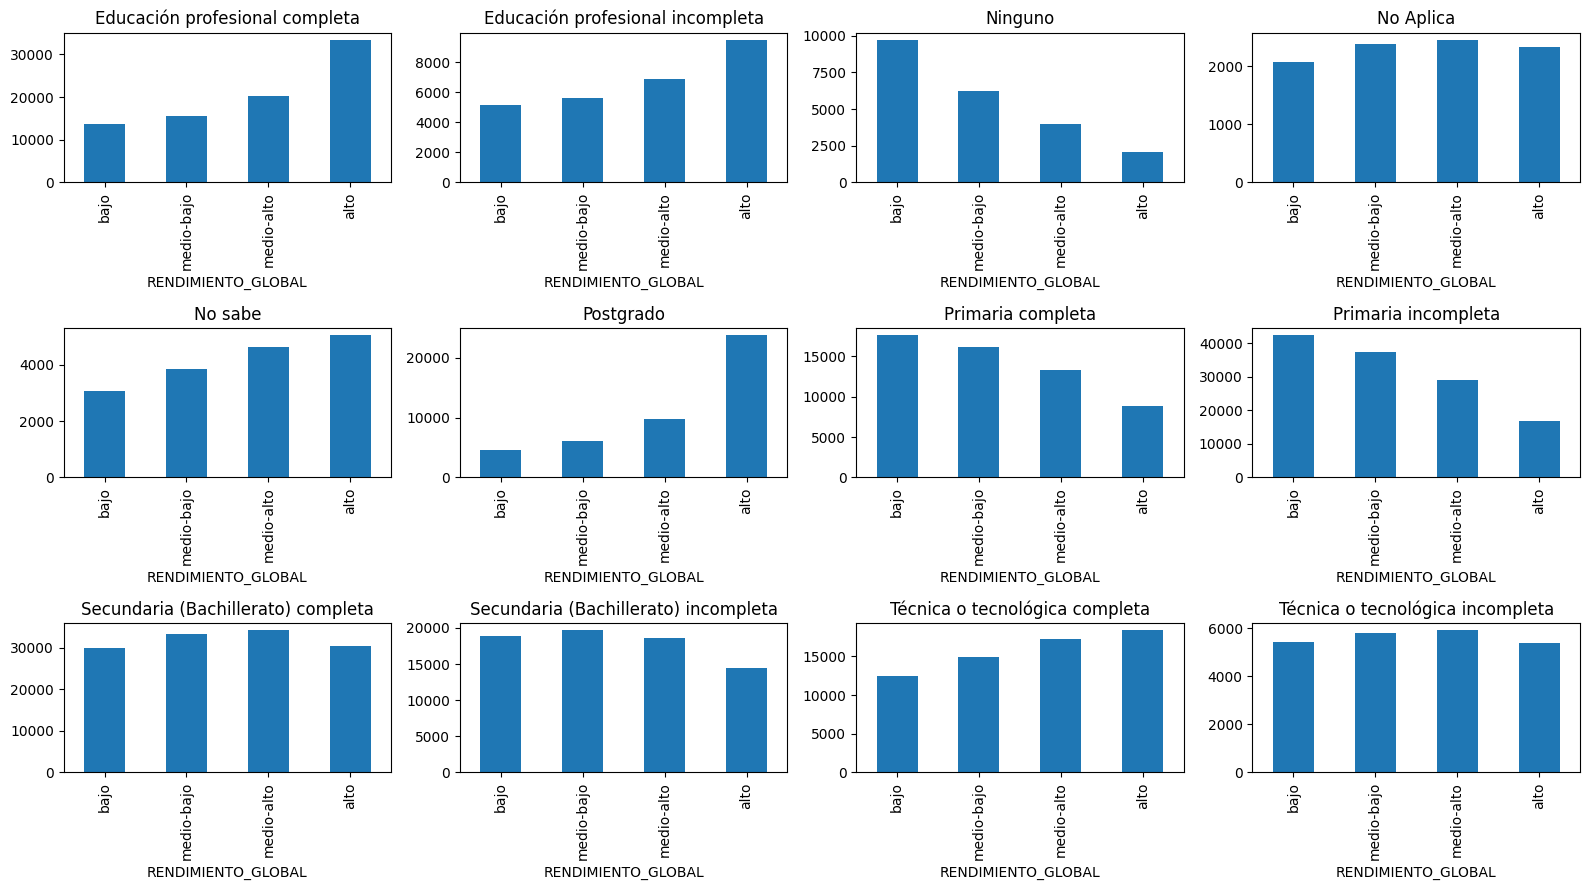

In [27]:
column = data.FAMI_EDUCACIONPADRE

c = sorted(column.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = data[column==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

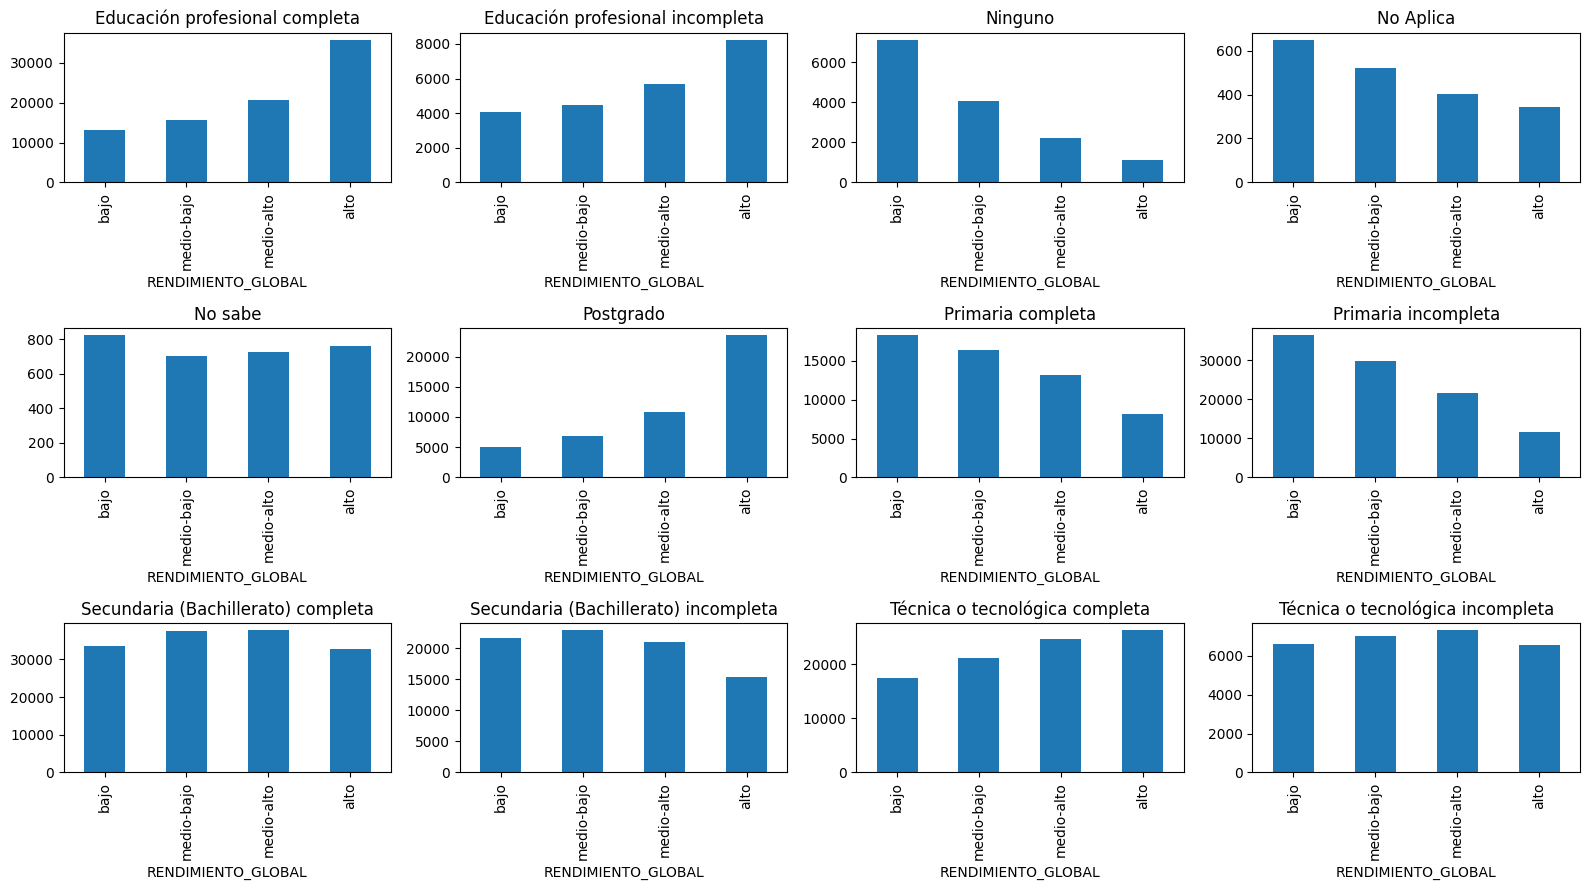

In [28]:
column = data.FAMI_EDUCACIONMADRE

c = sorted(column.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = data[column==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

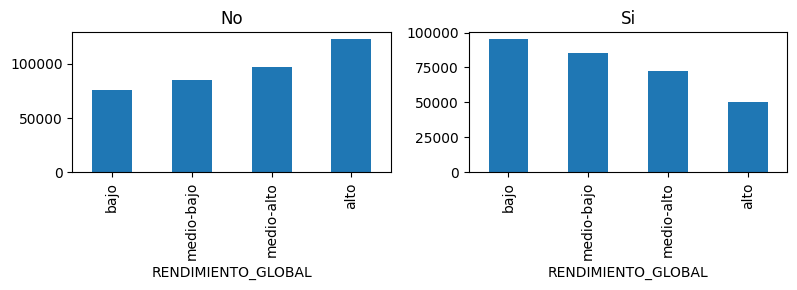

In [29]:
column = data.ESTU_PAGOMATRICULAPROPIO

c = sorted(column.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = data[column==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)